In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [2]:
# Import Illinois time-series data.
illinois_time_series_data = pd.read_csv("http://faculty.cs.niu.edu/~papka/data/cs627/wnij/illinois.csv")
illinois_time_series_data.head()

C:\Users\thewe\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (2,85,86) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Unnamed: 0 Week Ending Federal Provider Number             Provider Name  \
0           0  2020-05-24                  145000  WASHINGTON SENIOR LIVING   
1           1  2020-05-31                  145000  WASHINGTON SENIOR LIVING   
2           2  2020-06-07                  145000  WASHINGTON SENIOR LIVING   
3           3  2020-06-14                  145000  WASHINGTON SENIOR LIVING   
4           4  2020-06-21                  145000  WASHINGTON SENIOR LIVING   

  Provider Address Provider City Provider State  Provider Zip Code  \
0   1201 NEWCASTLE    WASHINGTON             IL              61571   
1   1201 NEWCASTLE    WASHINGTON             IL              61571   
2   1201 NEWCASTLE    WASHINGTON             IL              61571   
3   1201 NEWCASTLE    WASHINGTON             IL              61571   
4   1201 NEWCASTLE    WASHINGTON             IL              61571   

   Provider Phone Number    County  ...  \
0             3094443161  Tazewell  ...   
1             3094443161  Tazewell  ...   
2             3094443161  Tazewell  ...   
3             3094443161  Tazewell  ...   
4             3094443161  Tazewell  ...   

  Number of Residents Staying in this Facility for At Least 1 Day This Week who Received a Moderna COVID-19 Vaccine Booster at Any Time  \
0                                                NaN                                                                                      
1                                                NaN                                                                                      
2                                                NaN                                                                                      
3                                                NaN                                                                                      
4                                                NaN                                                                                      

  Number of Residents Staying in this Facility for At Least 1 Day This Week who Received a Janssen COVID-19 Vaccine Booster at Any Time  \
0                                                NaN                                                                                      
1                                                NaN                                                                                      
2                                                NaN                                                                                      
3                                                NaN                                                                                      
4                                                NaN                                                                                      

   Number of Residents Staying in this Facility for At Least 1 Day This Week who Received an Unspecified COVID-19 Vaccine Booster at Any Time  \
0                                                NaN                                                                                            
1                                                NaN                                                                                            
2                                                NaN                                                                                            
3                                                NaN                                                                                            
4                                                NaN                                                                                            

   Number of Healthcare Personnel with a Completed Vaccination Staying in this Facility for At Least 1 Day This Week who Received a COVID-19 Vaccine Booster at Any Time  \
0                                                NaN                                                                                   

In [3]:
illinois_time_series_data['Percent Boosted Staff'] = illinois_time_series_data['Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time']
illinois_time_series_data['Percent Completely Vaccinated Staff'] = illinois_time_series_data['Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time']

illinois_time_series_data['Percent Boosted Residents'] = illinois_time_series_data['Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time']
illinois_time_series_data['Percent Completely Vaccinated Residents'] = illinois_time_series_data['Percentage of Current Residents who Received a Completed COVID-19 Vaccination at Any Time']

In [4]:
# Define northern county lists.
northern_counties = ['Stephenson', 'Winnebago', 'Boone', 'Ogle','DeKalb']
northern_counties_5 = ['Stephenson', 'Winnebago', 'Boone', 'Ogle','DeKalb']
northerncounties_all = ['Boone', 'Bureau', 'Carroll', 'Cook', 'DeKalb', 'DuPage',
                       'Grundy', 'Henry', 'Jo Daviess', 'Kane', 'Kankakee',
                       'Kendall', 'Lake', 'LaSalle', 'Lee', 'McHenery', 'Mercer',
                       'Ogle', 'Putnam', 'Rock Island', 'Stephenson', 'Whiteside',
                       'Will','Winnebago']


# Time series data for Northern Counties.
northern_data = illinois_time_series_data[illinois_time_series_data['County'].isin(northern_counties)]

# Convert the Week Ending column to a datetime.
northern_data['Week Ending'] = pd.to_datetime(northern_data['Week Ending'])

#grouped_northern_data = northern_data.groupby(['County', 'Week Ending']).mean()
#grouped_northern_data

C:\Users\thewe\AppData\Local\Temp/ipykernel_29820/402816591.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_data['Week Ending'] = pd.to_datetime(northern_data['Week Ending'])


In [5]:
"""fig, ax = plt.subplots()

for key, grp in northern_data.groupby(['County']):
    ax = grp.plot(ax=ax, kind='line',x='Week Ending', y='Total Resident Confirmed COVID-19 Cases Per 1,000 Residents', label=key,  figsize=(20,10))
plt.xlabel('Date and Time')
plt.xticks()                                       
plt.show()"""

"fig, ax = plt.subplots()\n\nfor key, grp in northern_data.groupby(['County']):\n    ax = grp.plot(ax=ax, kind='line',x='Week Ending', y='Total Resident Confirmed COVID-19 Cases Per 1,000 Residents', label=key,  figsize=(20,10))\nplt.xlabel('Date and Time')\nplt.xticks()                                       \nplt.show()"

In [6]:
"""import plotly.express as px
northern_data.groupby('Provider Name').max().groupby('County').mean()"""

"import plotly.express as px\nnorthern_data.groupby('Provider Name').max().groupby('County').mean()"

In [7]:
df = northern_data.groupby('Provider Name').max().groupby('County').mean()['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents']
illinois_time_series_data['Is Northern Illinois'] = illinois_time_series_data['County'].isin(northern_counties)

C:\Users\thewe\AppData\Local\Temp/ipykernel_29820/2199015814.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df = northern_data.groupby('Provider Name').max().groupby('County').mean()['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents']


In [8]:
"""illinois_time_series_data.groupby(['County', 'Week Ending']).max()['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents']
#illinois_time_series_data.groupby(['County', 'Week Ending']).max()['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents'].plot(kind='bar', figsize=(20,10))
#plt.ylabel('Total Resident Confirmed COVID-19 Cases Per 1,000 Residents')"""

"illinois_time_series_data.groupby(['County', 'Week Ending']).max()['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents']\n#illinois_time_series_data.groupby(['County', 'Week Ending']).max()['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents'].plot(kind='bar', figsize=(20,10))\n#plt.ylabel('Total Resident Confirmed COVID-19 Cases Per 1,000 Residents')"

In [9]:
#import seaborn as sns
#df = illinois_time_series_data.groupby('Is Northern Illinois').max()['Total Resident Confirmed COVID-19 Cases Per 1,000 Residents']
#df
#sns.barplot(data=df, x=df.index, y = 'Total Resident Confirmed COVID-19 Cases Per 1,000 Residents')
#plt.figure(figsize=(20,10))
#plt.show()

In [10]:
#df

In [11]:
# Example plotly plots.
"""fig = px.bar(df, y="Total Resident Confirmed COVID-19 Cases Per 1,000 Residents", x=df.index, color=df.index,
             color_discrete_map={
                "Boone": "rgb(138, 174, 162)",
                "DeKalb": "rgb(232, 152, 24)",
                "Ogle": "rgb(102, 180, 97)",
                "Stephenson": "rgb(128, 161, 182)",
                "Winnebago": "rgb( 206, 112, 103)"},
             title="Explicit color mapping",
            width=800, height=400)
fig.show()"""

'fig = px.bar(df, y="Total Resident Confirmed COVID-19 Cases Per 1,000 Residents", x=df.index, color=df.index,\n             color_discrete_map={\n                "Boone": "rgb(138, 174, 162)",\n                "DeKalb": "rgb(232, 152, 24)",\n                "Ogle": "rgb(102, 180, 97)",\n                "Stephenson": "rgb(128, 161, 182)",\n                "Winnebago": "rgb( 206, 112, 103)"},\n             title="Explicit color mapping",\n            width=800, height=400)\nfig.show()'

C:\Users\thewe\AppData\Local\Temp/ipykernel_29820/1272465019.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  illinois_time_series_data[illinois_time_series_data['Is Northern Illinois']].groupby('Provider Name').max()['Percent Boosted Staff'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,10))


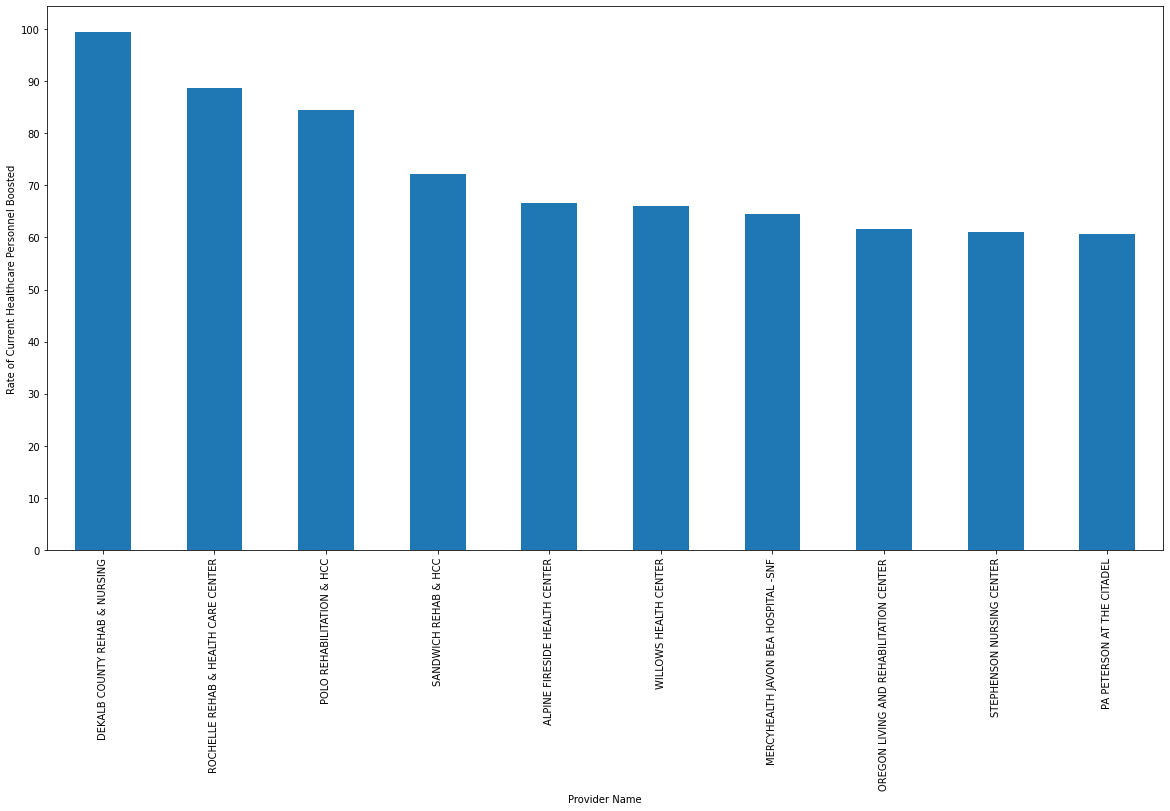

In [12]:
# Example Plot for rate of current staff boosted.
illinois_time_series_data[illinois_time_series_data['Is Northern Illinois']].groupby('Provider Name').max()['Percent Boosted Staff'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,10))
plt.ylabel("Rate of Current Healthcare Personnel Boosted")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

C:\Users\thewe\AppData\Local\Temp/ipykernel_29820/2074489432.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  illinois_time_series_data.groupby('Provider Name').max()['Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,10))


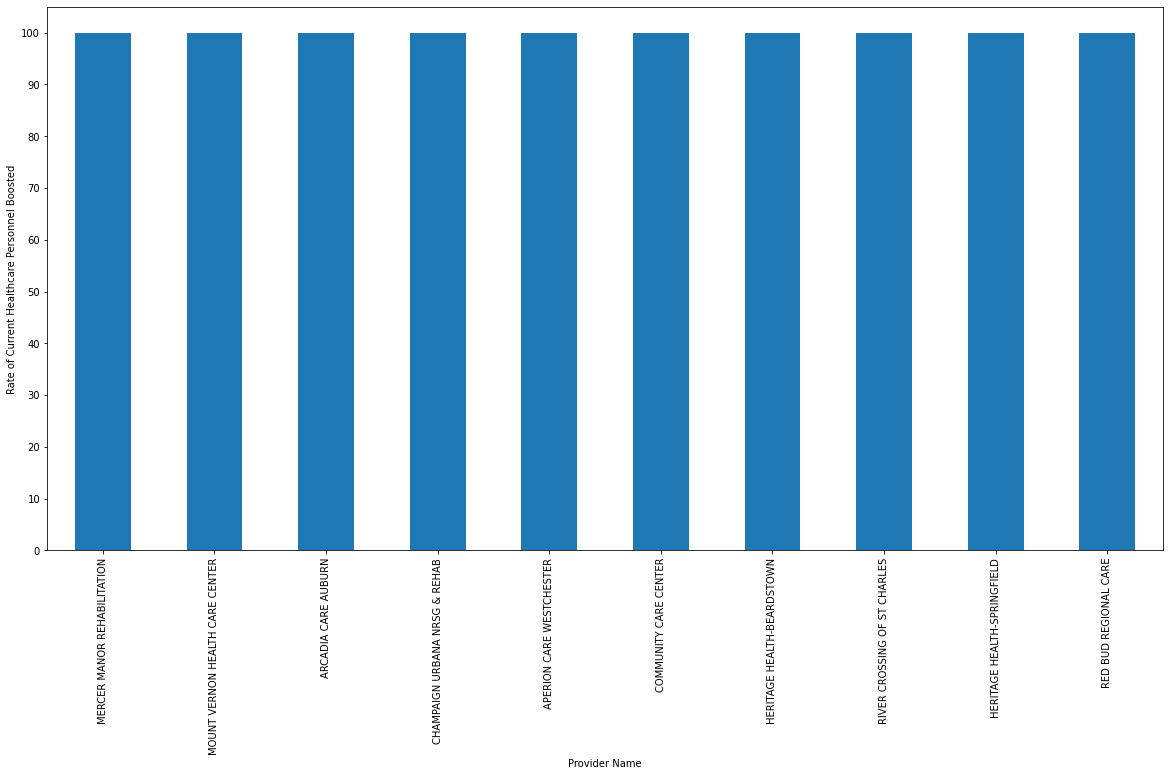

In [13]:
# Top 10 current staff boosted.
illinois_time_series_data.groupby('Provider Name').max()['Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,10))
plt.ylabel("Rate of Current Healthcare Personnel Boosted")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

In [14]:
# Check Bottom staff boosted in Northern IL.
illinois_time_series_data[illinois_time_series_data['Is Northern Illinois']].groupby(
    'Provider Name').max()['Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time'].sort_values().head(10)

C:\Users\thewe\AppData\Local\Temp/ipykernel_29820/2813248749.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  illinois_time_series_data[illinois_time_series_data['Is Northern Illinois']].groupby(


Provider Name
ROCK RIVER HEALTH CARE            0.000
MANOR COURT OF ROCHELLE           8.929
PEARL PAVILION                   10.909
ASCENSION SAINT ANNE PLACE       14.530
LENA LIVING CENTER               20.930
BETHANY REHAB & HCC              23.243
ALDEN PARK STRATHMOOR            27.642
EAST BANK CENTER, LLC            30.909
FAIR OAKS REHAB & HEALTHCARE     31.429
WILLOW CREST NURSING PAVILION    31.959
Name: Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time, dtype: float64

C:\Users\thewe\AppData\Local\Temp/ipykernel_29820/1292146715.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  illinois_time_series_data[illinois_time_series_data['Is Northern Illinois']].groupby('Provider Name').max()['Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time'].sort_values().head(10).plot(kind='bar', figsize=(20,10))


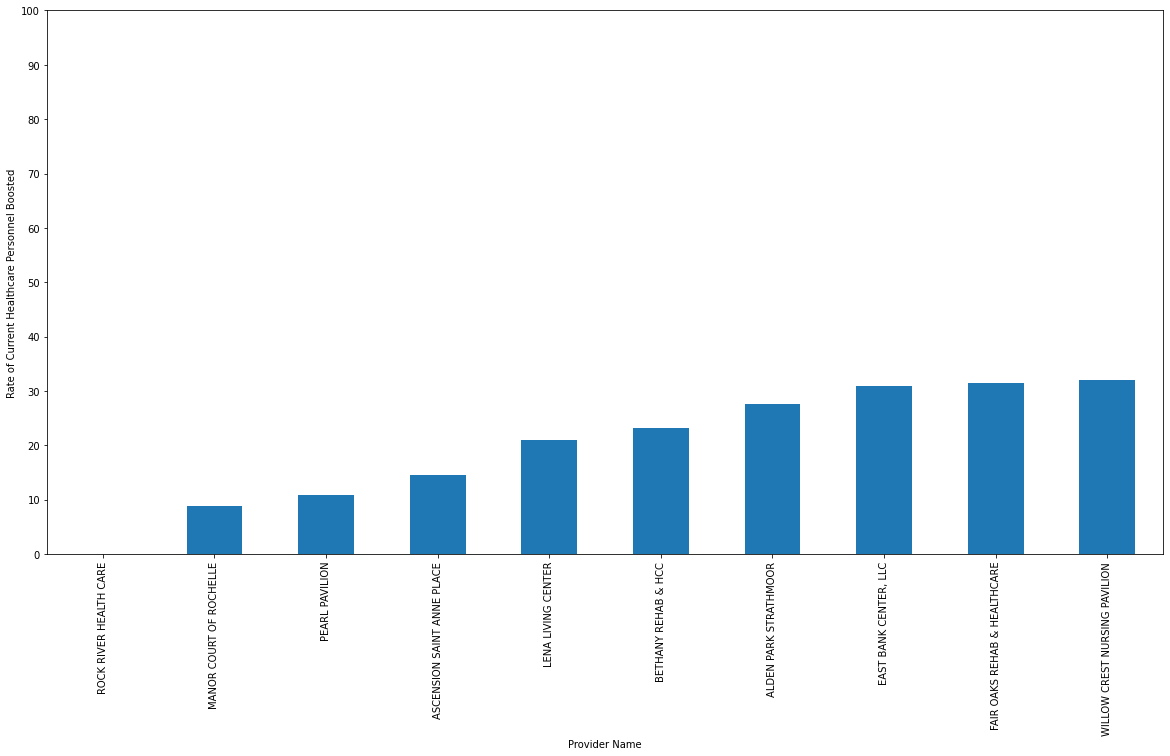

In [15]:
# Plot Bottom staff boosted in Northern IL.
illinois_time_series_data[illinois_time_series_data['Is Northern Illinois']].groupby('Provider Name').max()['Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time'].sort_values().head(10).plot(kind='bar', figsize=(20,10))
plt.ylabel("Rate of Current Healthcare Personnel Boosted")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

C:\Users\thewe\AppData\Local\Temp/ipykernel_29820/3197934083.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  illinois_time_series_data.groupby('Provider Name').max()['Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time'].sort_values().head(10).plot(kind='bar', figsize=(20,10))


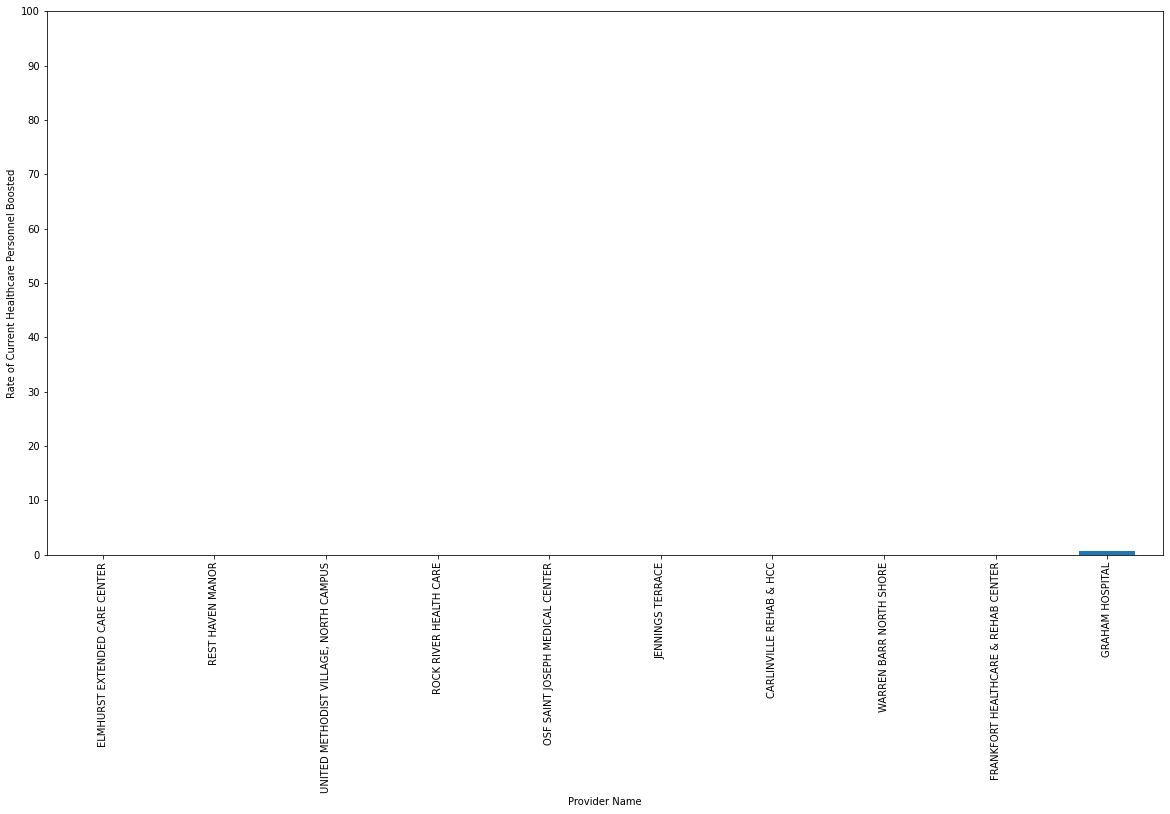

In [16]:
# Plot Bottom staff boosted in IL.
illinois_time_series_data.groupby('Provider Name').max()['Percentage of Current Healthcare Personnel with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time'].sort_values().head(10).plot(kind='bar', figsize=(20,10))
plt.ylabel("Rate of Current Healthcare Personnel Boosted")
plt.yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

## Work on Final Plots

### Plot 1 Top 10 Facilities by Deaths

In [17]:
# Function to define regions.
def set_region(value):
    # If the county is in the 5 Northern counties.
    if (value in northern_counties_5):
        return 'Northern 5 Counties'
    # If the county is in the rest of the northern counties. See wikipedia.
    elif value in northerncounties_all:
        return 'Rest of Northern IL'
    
    # If the county is in the rest of IL.
    else:
        return 'Rest of IL'

In [18]:
# Apply the region function.
illinois_time_series_data['Region'] = illinois_time_series_data['County'].apply(set_region)

# Create an attribute for the total number of COVID-19 deaths. 
illinois_time_series_data['Total COVID-19 Deaths'] = illinois_time_series_data['Residents Total COVID-19 Deaths'] + illinois_time_series_data['Staff Total COVID-19 Deaths']


# Show that the function worked.
set(illinois_time_series_data.Region)

{'Northern 5 Counties', 'Rest of IL', 'Rest of Northern IL'}

In [19]:
# Check that the attributes were created.
illinois_time_series_data

Unnamed: 0 Week Ending Federal Provider Number  \
0               0  2020-05-24                  145000   
1               1  2020-05-31                  145000   
2               2  2020-06-07                  145000   
3               3  2020-06-14                  145000   
4               4  2020-06-21                  145000   
...           ...         ...                     ...   
64346       64346  2022-01-16                  14E888   
64347       64347  2022-01-23                  14E888   
64348       64348  2022-01-30                  14E888   
64349       64349  2022-02-06                  14E888   
64350       64350  2022-02-13                  14E888   

                    Provider Name     Provider Address Provider City  \
0        WASHINGTON SENIOR LIVING       1201 NEWCASTLE    WASHINGTON   
1        WASHINGTON SENIOR LIVING       1201 NEWCASTLE    WASHINGTON   
2        WASHINGTON SENIOR LIVING       1201 NEWCASTLE    WASHINGTON   
3        WASHINGTON SENIOR LIVING       1201 NEWCASTLE    WASHINGTON   
4        WASHINGTON SENIOR LIVING       1201 NEWCASTLE    WASHINGTON   
...                           ...                  ...           ...   
64346  SHARON HEALTH CARE WILLOWS  3520 NORTH ROCHELLE        PEORIA   
64347  SHARON HEALTH CARE WILLOWS  3520 NORTH ROCHELLE        PEORIA   
64348  SHARON HEALTH CARE WILLOWS  3520 NORTH ROCHELLE        PEORIA   
64349  SHARON HEALTH CARE WILLOWS  3520 NORTH ROCHELLE        PEORIA   
64350  SHARON HEALTH CARE WILLOWS  3520 NORTH ROCHELLE        PEORIA   

      Provider State  Provider Zip Code  Provider Phone Number    County  ...  \
0                 IL              61571             3094443161  Tazewell  ...   
1                 IL              61571             3094443161  Tazewell  ...   
2                 IL              61571             3094443161  Tazewell  ...   
3                 IL              61571             3094443161  Tazewell  ...   
4                 IL              61571             3094443161  Tazewell  ...   
...              ...                ...                    ...       ...  ...   
64346             IL              61604             3096880451    Peoria  ...   
64347             IL              61604             3096880451    Peoria  ...   
64348             IL              61604             3096880451    Peoria  ...   
64349             IL              61604             3096880451    Peoria  ...   
64350             IL              61604             3096880451    Peoria  ...   

      Number of Healthcare Personnel Staying in this Facility for At Least 1 Day This Week who Received a Moderna COVID-19 Vaccine Booster at Any Time  \
0                                                    NaN                                                                                                 
1                                                    NaN                                                                                                 
2                                                    NaN                                                                                                 
3                                                    NaN                                                                                                 
4                                                    NaN                                                                                                 
...                                                  ...                                                                                                 
64346                                                NaN                                                                                                 
64347                                                1.0                                                                                                 
64348                                                1.0                                          

C:\Users\thewe\AppData\Local\Temp/ipykernel_29820/2637524394.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  illinois_time_series_data_group_provider =illinois_time_series_data.groupby('Provider Name').max()


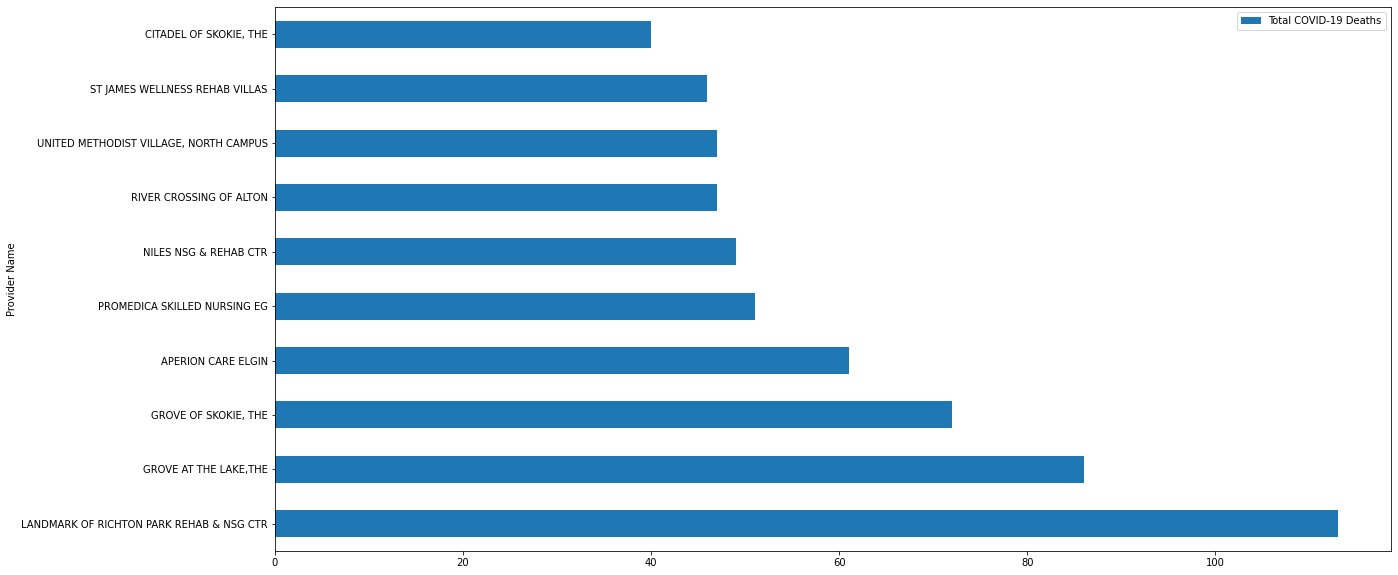

In [20]:
# Example plot of the total covid-19 deaths.
illinois_time_series_data_group_provider =illinois_time_series_data.groupby('Provider Name').max()
illinois_time_series_data_group_provider.sort_values('Total COVID-19 Deaths',ascending=False).head(10).plot(y = 'Total COVID-19 Deaths',kind='barh', figsize=(20,10))
plt.show()

In [21]:
"""illinois_time_series_data.groupby('Provider Name').max()['Total Resident COVID-19 Deaths Per 1,000 Residents'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,10))
plt.yticks((0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000))
plt.show()"""

"illinois_time_series_data.groupby('Provider Name').max()['Total Resident COVID-19 Deaths Per 1,000 Residents'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,10))\nplt.yticks((0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000))\nplt.show()"

### Plot 1 Top 10 by Deaths

In [84]:
# Starting code for Plot 1.

# Create the chart.
plot1_chart = alt.Chart(illinois_time_series_data_group_provider.reset_index().sort_values('Total COVID-19 Deaths',ascending=False).head(10).sort_values('Total COVID-19 Deaths',ascending=False)).mark_bar().encode(
    x='Total COVID-19 Deaths',
    y=alt.Y('Provider Name',title='Facility Name',sort='-x'),
    color=alt.Color('Region', scale=alt.Scale(range=['#e89818', '#00929F']), sort=['Northern 5 Counties', 'Rest of Northern IL', 'Rest of IL'])).properties(
    title='Top 10 Facilities by Deaths in Illinois')

#text = alt.Chart(illinois_time_series_data_group_provider.reset_index().sort_values('Total COVID-19 Deaths',ascending=False).head(10).sort_values('Total COVID-19 Deaths',ascending=False)).mark_text(dx=-60,color='black').encode(
#    y= alt.Y('Provider Name'),
#    text=alt.Text('Provider Name'))

# Configure the chart font.
plot1_chart.configure_title(font='Century Gothic',
                     fontSize = 14).configure_axisX(
                        labelFont='Century Gothic').configure_axisY(labelFont='Century Gothic', labelLimit=1000, titleX=-250)


alt.Chart(...)

In [23]:
#illinois_time_series_data[illinois_time_series_data['Is Northern Illinois']].groupby('Provider Name').max()['Residents Total COVID-19 Deaths'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,10))
#plt.show()

### Columns for plots 2-5

Plot 2 and Plot 4: Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time (GZ)

Plot 3 and Plot 5: Percentage of Current Residents who Received a Completed COVID-19 Vaccination at Any Time (GF)

In [24]:
# Subset the data for the top percent boosted staff (100% vaccinated).
top_perc_boosted_staff = illinois_time_series_data_group_provider[illinois_time_series_data_group_provider['Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time'] == 100].sort_values('Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time', ascending=False)

# Subset the data for percent vaccinated in northern 5 counties.
top_perc_vaccinated_staff_northern5 = illinois_time_series_data_group_provider[illinois_time_series_data_group_provider['County'].isin(northern_counties_5)].sort_values('Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time', ascending=False)

#illinois_time_series_data_group_provider_top_perc_staff = illinois_time_series_data_group_provider_top_perc_staff.sort_values(['Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time'], ascending=False
top_perc_boosted_staff.head(10)['Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time']

Provider Name
PROMEDICA SKILLED NURSING LIB      100.0
BRITISH HOME, THE                  100.0
PLYMOUTH PLACE                     100.0
MOUNT VERNON HEALTH CARE CENTER    100.0
MATHER EVANSTON, THE               100.0
BEACON HILL                        100.0
SMITH CROSSING                     100.0
ST JOSEPH VILLAGE OF CHICAGO       100.0
COUNTRYSIDE NURSING & REHAB CTR    100.0
ASCENSION HERITAGE VILLAGE         100.0
Name: Percentage of Current Residents with a Completed Vaccination who Received a COVID-19 Vaccine Booster at Any Time, dtype: float64

### Plot 2 Top 10 Facilities by Percent Vaccinated Staff

In [25]:
# Create the chart.
chart = alt.Chart(top_perc_boosted_staff.reset_index()).mark_bar().encode(
    x=alt.X('Provider Name', title='Facility Name', sort='-y'),
    y=alt.Y('Percent Boosted Staff',
           title='Percent of Completely Vaccinated Staff who Have Received a Booster'),
    color='Region').properties(title='Percent of Completely Vaccinated Staff who Have Received a Booster by Facility')

# Configure the fonts.
chart.configure_title(font='Century Gothic',
                     fontSize = 14).configure_axisX(
                        labelFont='Century Gothic').configure_axisY(labelFont='Century Gothic')

alt.Chart(...)

In [98]:
# Create the chart.
chart = alt.Chart(top_perc_vaccinated_staff_northern5.head(10).reset_index()).mark_bar().encode(
    y=alt.Y('Provider Name', title="Facility Name",sort='-x'),
    x=alt.X('Percent Completely Vaccinated Staff',
           title="Percent Completely Vaccinated Staff (%)"),
    color=alt.Color('Region',scale=alt.Scale(range=['#ce7067']))).properties(title='Top 10 Facilities by Percentage Vaccinated Staff in The Northern 5 Counties')

# Configure the fonts.
chart.configure_title(font='Century Gothic',
                     fontSize = 14).configure_axisX(
                        labelFont='Century Gothic').configure_axisY(labelFont='Century Gothic', labelLimit=300, titleX=-250)

alt.Chart(...)

In [27]:
# Show that there are 97 completely vaccinated facilities by staff.
top_perc_boosted_staff.head(100)['Percent Completely Vaccinated Staff']

Provider Name
PROMEDICA SKILLED NURSING LIB      100.0
BRITISH HOME, THE                  100.0
PLYMOUTH PLACE                     100.0
MOUNT VERNON HEALTH CARE CENTER    100.0
MATHER EVANSTON, THE               100.0
                                   ...  
CENTER HOME HISPANIC ELDERLY       100.0
OAK LAWN RESPIRATORY & REHAB       100.0
AVANTARA LONG GROVE                100.0
BRIA OF PALOS HILLS                100.0
ELMHURST EXTENDED CARE CENTER      100.0
Name: Percent Completely Vaccinated Staff, Length: 97, dtype: float64

In [28]:

#illinois_time_series_data_group_provider_top_perc_staff.head(100).plot(y ='Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time',kind='barh', figsize=(20,10))

In [29]:
# Define subset for completely vaccined residents
top_perc_vaccinated_residents = illinois_time_series_data_group_provider.sort_values('Percentage of Current Residents who Received a Completed COVID-19 Vaccination at Any Time', ascending=False).head(100)

# Define subsert for completely vaccinated in norther il.
top_perc_vaccinated_residents_northern5 = illinois_time_series_data_group_provider[illinois_time_series_data_group_provider['County'].isin(northern_counties_5)].sort_values('Percentage of Current Residents who Received a Completed COVID-19 Vaccination at Any Time', ascending=False)

top_perc_vaccinated_residents['Percentage of Current Residents who Received a Completed COVID-19 Vaccination at Any Time']

Provider Name
HERITAGE HEALTH-STREATOR                 100.0
CLARK-LINDSEY VILLAGE                    100.0
IMBODEN CREEK LIVING CENTER              100.0
SHAWNEE SENIOR LIVING                    100.0
CENTRALIA MANOR                          100.0
                                         ...  
FARMINGTON COUNTRY MANOR                 100.0
PROCTOR COM HSP SK N CENTER              100.0
FIRESIDE HOUSE OF CENTRALIA              100.0
PRESENCE ST JOSEPH HOSPITAL - CHICAGO    100.0
PRAIRIEVIEW AT THE GARLANDS              100.0
Name: Percentage of Current Residents who Received a Completed COVID-19 Vaccination at Any Time, Length: 100, dtype: float64

### Plot 3: Top 10 Facilities by Percentage Vaccinated Residents

In [30]:
# Create chart.
chart = alt.Chart(top_perc_vaccinated_residents.reset_index()).mark_bar().encode(
    x=alt.X('Provider Name', title='Facility Name', sort='-y'),
    y=alt.Y('Percent Boosted Residents',
           title='Percent of Completely Vaccinated Residents who Have Received a Booster'),
    color='Region').properties(title='Percent of Completely Vaccinated Residents who Have Received a Booster by Facility')

# Configure fonts.
chart.configure_title(font='Century Gothic',
                     fontSize = 14).configure_axisX(
                        labelFont='Century Gothic').configure_axisY(labelFont='Century Gothic')

alt.Chart(...)

In [97]:
# Create chart.
chart = alt.Chart(top_perc_vaccinated_residents_northern5.head(10).reset_index()).mark_bar().encode(
    y=alt.Y('Provider Name', title="Facility Name",sort='-x'),
    x=alt.X('Percent Completely Vaccinated Residents',
           title="Percent Completely Vaccinated Residents(%)"),
    color=alt.Color('Region',scale=alt.Scale(range=['#ce7067']))).properties(title='Top 10 Facilities by Percentage Vaccinated Residents in The Northern 5 Counties')

# Configure fonts.
chart.configure_title(font='Century Gothic',
                     fontSize = 14).configure_axisX(
                        labelFont='Century Gothic').configure_axisY(labelFont='Century Gothic', labelLimit=250, titleX=-220)

alt.Chart(...)

### Plot 4: Bottom 10 Facilities by Percentage Vaccinated Staff

In [32]:
# Show bottom 50 for staff vaccination.
illinois_time_series_data_group_provider['Percent Completely Vaccinated Staff'].sort_values(ascending=False).tail(50)

Provider Name
CISNE REHABILITATION & HEALTH CENTER               64.516
BRIA OF BELLEVILLE                                 64.486
RIVER CROSSING OF PEORIA                           64.348
JONESBORO REHAB & HCC                              64.286
GOLDEN GOOD SHEPHERD HOME                          64.286
HILLTOP SKILLED NSG & REHAB                        64.045
HELIA HEALTHCARE OF NEWTON                         63.462
ALLURE OF GALESBURG                                63.218
GIBSON COMMUNITY HSP ANNEX                         62.963
ACCOLADE HEALTHCARE DANVILLE                       62.887
SHAWNEE SENIOR LIVING                              61.682
MACOMB POST ACUTE CARE CENTER                      61.667
NOKOMIS REHAB & HEALTH CARE CENTER                 61.111
MCLEANSBORO REHAB & HLTH C CTR                     60.526
APERION CARE FAIRFIELD                             60.000
CARLYLE HEALTHCARE & SR LIVING                     60.000
APOSTOLIC CHRISTIAN HOME                           59.434


In [93]:
# Create the chart.
chart = alt.Chart(illinois_time_series_data_group_provider[illinois_time_series_data_group_provider['Percent Completely Vaccinated Staff'].notnull()].reset_index().sort_values('Percent Completely Vaccinated Staff',ascending=False).tail(10)).mark_bar().encode(
    y=alt.Y('Provider Name', title='Facility Name', sort='-x'),
    x=alt.X('Percent Completely Vaccinated Staff', title='Percent Completely Vaccinated Staff (%)', scale=alt.Scale(domain=[0,100])),
    color=alt.Color('Region', scale=alt.Scale(range=['#00929F']))).properties(title='Bottom 10 Facilities by Percentage Vaccinated Staff')

# Configure the fonts.
chart.configure_title(font='Century Gothic',
                     fontSize = 14).configure_axisX(
                        labelFont='Century Gothic').configure_axisY(labelFont='Century Gothic', labelLimit=300, titleX=-230)

alt.Chart(...)

### Plot 5: Bottom 10 Facilities by Percentage Vaccinated Residents

In [34]:
# Show the bottom 50 for vaccinated residents.
illinois_time_series_data_group_provider['Percent Completely Vaccinated Residents'].sort_values(ascending=False).tail(50)

Provider Name
AVANTARA LONG GROVE                                83.562
ALDEN DES PLAINES REHAB & HC                       83.333
INTEGRITY HC OF ALTON                              83.051
LANDMARK OF DES PLAINES REHAB                      82.517
MIDWAY NEUROLOGICAL / REHAB CENTER                 81.564
MEADOWBROOK MANOR - LAGRANGE                       81.560
ESTATES OF HYDE PARK, THE                          81.553
UNIVERSITY NSG & REHAB CENTER                      81.356
ELEVATE CARE WAUKEGAN                              81.250
ARCADIA CARE CLIFTON                               80.882
ST JAMES WELLNESS REHAB VILLAS                     80.723
APERION CARE FOREST PARK                           80.000
BEACON CARE AND REHABILITATION                     80.000
INTEGRITY HC OF HERRIN                             80.000
SALUD WELLNESS                                     79.787
AUSTIN OASIS, THE                                  79.630
EL PASO HEALTH CARE CENTER                         79.487


In [96]:
# Create the chart.
chart = alt.Chart(illinois_time_series_data_group_provider[illinois_time_series_data_group_provider['Percent Completely Vaccinated Residents'].notnull()].reset_index().sort_values('Percent Completely Vaccinated Residents',ascending=False).tail(10)).mark_bar().encode(
    y=alt.Y('Provider Name', title='Facility Name', sort='-x'),
    x=alt.X('Percent Completely Vaccinated Residents', title='Percent Completely Vaccinated Residents (%)', scale=alt.Scale(domain=[0,100])),
    color=alt.Color('Region', scale=alt.Scale(range=['#ce7067','#e89818', '#00929F']),sort=['Northern 5 Counties', 'Rest of Northern IL', 'Rest of IL'])).properties(title='Bottom 10 Facilities by Percentage Vaccinated Residents')

# Configure the fonts.
chart.configure_title(font='Century Gothic',
                     fontSize = 14).configure_axisX(
                        labelFont='Century Gothic').configure_axisY(labelFont='Century Gothic')

alt.Chart(...)